In [1]:
 %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

#  Reflect Tables into SQLAlchemy ORM

In [3]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
 # create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite", echo = False)

In [5]:
 # reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
 # View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
 # Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
 # Create our session (link) from Python to the DB
session = Session(engine)


In [9]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [10]:
#Use inspector to familiarize self with data types in measurement table
inspector = inspect(engine)
m_columns = inspector.get_columns('measurement')
for c in m_columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [12]:
#Use inspector to familiarize self with data types in station table
inspector = inspect(engine)
s_columns = inspector.get_columns('station')
for c in s_columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


#  Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [14]:
 # Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print('Query Date:', query_date)


Query Date: 2016-08-23


In [15]:
# Perform a query to retrieve the data and precipitation scores
#sel = [Measurement.date, Measurement.prcp]
# results = session.query(Measurement.date, func.sum(Measurement.prcp)).\
#     filter(func.strftime(Measurement.date >= query_date)).\
#     group_by(Measurement.date).\
#     order_by(func.sum(Measurement.prcp).desc()).all()
# results

results = session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime(Measurement.date >= query_date)).all()
    #order_by(func.sum(Measurement.prcp).desc()).all()
results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip =pd.DataFrame(results, columns = ['Date', 'Precipitation'])
precip.set_index('Date', inplace =True)
precip

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [17]:
# Sort the dataframe by date
precip_sort=precip.sort_values("Date")
precip_sort

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


<Figure size 432x288 with 0 Axes>

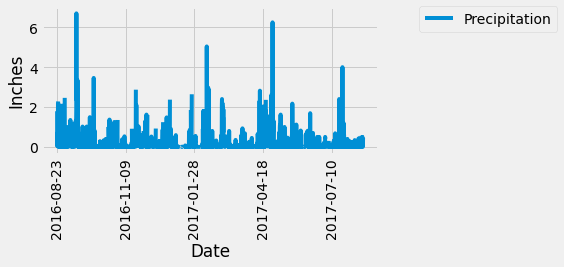

In [18]:
 # # Use Pandas Plotting with Matplotlib to plot the data
#precip_sort.plot()
#xticks = ['2016-08-23', '2016-10-01','2016-11-09','2-16-12-19','2017-01-28','2017-03-09','2017-04-18','2017-05-31','2017-07-10']
plt.figure()
precip_sort.plot()
plt.ylabel('Inches')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
#plt.rcParams['figure.figsize'] = [10, 5]
plt.savefig('precipitation.png')
plt.show()

In [19]:
#Use Pandas to calcualte the summary statistics for the precipitation data
precip_sort.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
 # Design a query to calculate the total number stations in the dataset
total = session.query(func.count(Measurement.station)).all()
total

[(19550)]

In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
#WRONGG!
# List the stations and the counts in descending order.
sel = [Measurement.station,Measurement.tobs]
#station_ordered_count = session.query(Measurement.station, func.count(Measurement.tobs)).\
station_list = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(Measurement.tobs.desc()).all()
station_list

[('USC00519523', 75.0),
 ('USC00517948', 75.0),
 ('USC00516128', 73.0),
 ('USC00518838', 72.0),
 ('USC00519281', 70.0),
 ('USC00514830', 67.0),
 ('USC00513117', 67.0),
 ('USC00511918', 66.0),
 ('USC00519397', 65.0)]

In [48]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
#WRONGGG
# List the stations and the counts in descending order.
sel = [Measurement.station,Measurement.tobs]
station_ordered_count = session.query(*sel, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()
station_ordered_count

[('USC00519281', 70.0, 2772),
 ('USC00519397', 65.0, 2724),
 ('USC00513117', 67.0, 2709),
 ('USC00519523', 75.0, 2669),
 ('USC00516128', 73.0, 2612),
 ('USC00514830', 67.0, 2202),
 ('USC00511918', 66.0, 1979),
 ('USC00517948', 75.0, 1372),
 ('USC00518838', 72.0, 511)]

In [30]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# RIGHT!
# List the stations and the counts in descending order.
station_ordered_count = session.query(Measurement.id,Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()
station_ordered_count


[(12188, 'USC00519281', 2772),
 (1, 'USC00519397', 2724),
 (2725, 'USC00513117', 2709),
 (9519, 'USC00519523', 2669),
 (16939, 'USC00516128', 2612),
 (5434, 'USC00514830', 2202),
 (14960, 'USC00511918', 1979),
 (7636, 'USC00517948', 1372),
 (9008, 'USC00518838', 511)]

In [28]:
 # Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Query all temperatures for most active station
id_sel = [Measurement.id,Measurement.station,Measurement.tobs]
id_temp = session.query(*id_sel).\
    filter(Measurement.id == '12188').\
    order_by(Measurement.tobs.desc()).all()
id_temp


[(12188, 'USC00519281', 70.0)]

In [26]:
# Query all temperatures for most active station
sel = [Measurement.id,Measurement.station,Measurement.tobs]
station_temp = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.tobs.desc()).all()
station_temp


[(14261, 'USC00519281', 85.0),
 (14260, 'USC00519281', 84.0),
 (14207, 'USC00519281', 83.0),
 (14256, 'USC00519281', 83.0),
 (14953, 'USC00519281', 83.0),
 (12434, 'USC00519281', 82.0),
 (12710, 'USC00519281', 82.0),
 (13141, 'USC00519281', 82.0),
 (13151, 'USC00519281', 82.0),
 (14201, 'USC00519281', 82.0),
 (14249, 'USC00519281', 82.0),
 (14595, 'USC00519281', 82.0),
 (14602, 'USC00519281', 82.0),
 (14942, 'USC00519281', 82.0),
 (14948, 'USC00519281', 82.0),
 (14952, 'USC00519281', 82.0),
 (12349, 'USC00519281', 81.0),
 (12779, 'USC00519281', 81.0),
 (12791, 'USC00519281', 81.0),
 (13074, 'USC00519281', 81.0),
 (13416, 'USC00519281', 81.0),
 (13430, 'USC00519281', 81.0),
 (13486, 'USC00519281', 81.0),
 (13530, 'USC00519281', 81.0),
 (13578, 'USC00519281', 81.0),
 (13786, 'USC00519281', 81.0),
 (14258, 'USC00519281', 81.0),
 (14259, 'USC00519281', 81.0),
 (14264, 'USC00519281', 81.0),
 (14582, 'USC00519281', 81.0),
 (14590, 'USC00519281', 81.0),
 (14593, 'USC00519281', 81.0),
 (14594,

In [31]:
#Query min, max, and average temperatures for most active station using func
station_temps = session.query(Measurement.station,\
    func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
station_temps

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [32]:
# Using the most active station id, determine the most recent observation date

recent = session.query(Measurement.date).\
    filter(Measurement.station =='USC00519281').\
    order_by(Measurement.date.desc()).first()
recent

('2017-08-18')

In [33]:
#Using the most recent observation date, determine the date a year before
query_date_active_station = dt.date(2017, 8, 18) - dt.timedelta(days = 365)
print('Query Date:', query_date_active_station)

Query Date: 2016-08-18


In [34]:
#Using the query date, use a filter to query the last 12 months of temperature observation data for this station
station_temp_year = session.query(Measurement.station,Measurement.date, Measurement.tobs).\
    filter((Measurement.date >= '2016-08-18'), (Measurement.station == 'USC00519281')).\
    order_by(Measurement.date.desc()).all()
station_temp_year

[('USC00519281', '2017-08-18', 79.0),
 ('USC00519281', '2017-08-17', 76.0),
 ('USC00519281', '2017-08-16', 76.0),
 ('USC00519281', '2017-08-15', 77.0),
 ('USC00519281', '2017-08-14', 77.0),
 ('USC00519281', '2017-08-13', 77.0),
 ('USC00519281', '2017-08-06', 83.0),
 ('USC00519281', '2017-08-05', 82.0),
 ('USC00519281', '2017-08-04', 77.0),
 ('USC00519281', '2017-07-31', 76.0),
 ('USC00519281', '2017-07-30', 81.0),
 ('USC00519281', '2017-07-29', 82.0),
 ('USC00519281', '2017-07-28', 81.0),
 ('USC00519281', '2017-07-27', 76.0),
 ('USC00519281', '2017-07-26', 75.0),
 ('USC00519281', '2017-07-25', 77.0),
 ('USC00519281', '2017-07-24', 75.0),
 ('USC00519281', '2017-07-23', 82.0),
 ('USC00519281', '2017-07-22', 77.0),
 ('USC00519281', '2017-07-21', 77.0),
 ('USC00519281', '2017-07-20', 77.0),
 ('USC00519281', '2017-07-19', 76.0),
 ('USC00519281', '2017-07-18', 76.0),
 ('USC00519281', '2017-07-17', 76.0),
 ('USC00519281', '2017-07-16', 80.0),
 ('USC00519281', '2017-07-15', 80.0),
 ('USC005192

In [35]:
#Create a dataframe to hold results of the 12 month query
temp_over_time = pd.DataFrame(station_temp_year, columns = ['Station','Date','Temperature'])
temp_over_time.set_index('Station' , inplace = True)
temp_over_time

,Date,Temperature
Station,,
USC00519281,2017-08-18,79.0
USC00519281,2017-08-17,76.0
USC00519281,2017-08-16,76.0
USC00519281,2017-08-15,77.0
USC00519281,2017-08-14,77.0
...,...,...
USC00519281,2016-08-22,78.0
USC00519281,2016-08-21,79.0
USC00519281,2016-08-20,81.0


In [36]:
#Query the name of the station
active_station =  session.query(Station.name).\
    filter(Station.station == 'USC00519281').all()
active_station

[('WAIHEE 837.5, HI US')]

<Figure size 504x360 with 0 Axes>

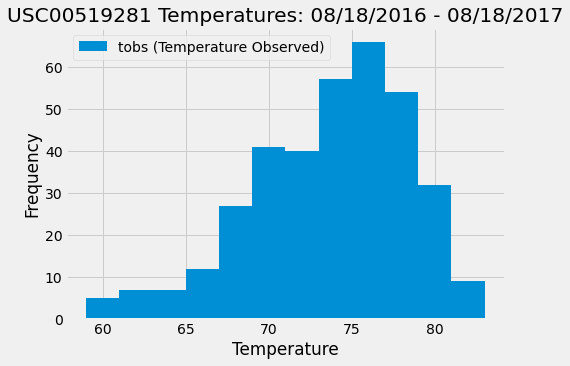

In [58]:
#Plot the results as a histogram
plt.figure()
temp_over_time.hist(bins =12)
plt.legend(['tobs (Temperature Observed)'])
plt.title('USC00519281 Temperatures: 08/18/2016 - 08/18/2017' )
plt.ylabel('Frequency')
plt.xlabel('Temperature')
#plt.rcParams['figure.figsize'] = [7, 5]
plt.savefig('Active_Station_Temp.png')
plt.show()

# Close session

In [ ]:
 # Close Session
session.close()